In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
import pandas as pd

In [3]:
adult_df = pd.read_csv('../input/adult-income-dataset/adult.csv')
adult_df 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Начинаю с исследования данных

In [4]:
adult_df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Сразу заменю числами

In [5]:
adult_df['income'] = adult_df['income'].apply(lambda inc: 1 if inc == ">50K" else 0)

In [6]:
adult_df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

<AxesSubplot:>

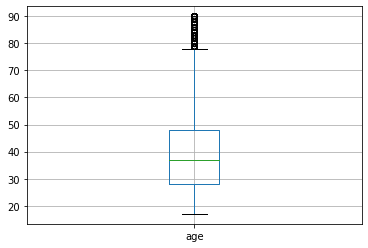

In [7]:
adult_df.boxplot(column=['age'])

Приметил выбивающиеся данные у возраста. В тренеровочной выборке попробую их удалить и посмтореть как скажется на результате

In [8]:
adult_df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Две последние категории очень немногочислены, отброшу

In [9]:
adult_df.loc[adult_df['workclass'] == "Without-pay"] = "?"
adult_df.loc[adult_df['workclass'] == "Never-worked"] = "?"

In [10]:
adult_df['fnlwgt'].value_counts()

?         31
203488    21
120277    19
190290    19
125892    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28507, dtype: int64

Долго думал что это. Загуглил. Спросил в телеге. Посчитал. Возможно какие-нибудь коды школ и тд. В любом случае, если только не дейсвительно численность определённого типа, то объединяет слишком маленькие группы людей, можно отбросить

In [11]:
adult_df = adult_df.drop('fnlwgt', axis = 1)

In [12]:
adult_df['education'].value_counts()

HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
?                  31
Name: education, dtype: int64

In [13]:
adult_df['educational-num'].value_counts()

9     15768
10    10873
13     8025
14     2657
11     2061
7      1809
12     1599
6      1387
4       952
15      834
5       756
8       657
16      594
3       509
2       247
1        83
?        31
Name: educational-num, dtype: int64

In [14]:
adult_df['marital-status'].value_counts()

Married-civ-spouse       22365
Never-married            16104
Divorced                  6632
Separated                 1530
Widowed                   1517
Married-spouse-absent      626
Married-AF-spouse           37
?                           31
Name: marital-status, dtype: int64

In [15]:
adult_df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
?                    2830
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Тут последние сделаю "?"

In [16]:
adult_df.loc[adult_df['occupation'] == "Armed-Forces"] = "?"

In [17]:
adult_df['relationship'].value_counts()

Husband           19702
Not-in-family     12577
Own-child          7564
Unmarried          5123
Wife               2327
Other-relative     1503
?                    46
Name: relationship, dtype: int64

In [18]:
adult_df['race'].value_counts()

White                 41723
Black                  4680
Asian-Pac-Islander     1518
Amer-Indian-Eskimo      469
Other                   406
?                        46
Name: race, dtype: int64

In [19]:
adult_df['gender'].value_counts()

Male      32614
Female    16182
?            46
Name: gender, dtype: int64

In [20]:
adult_df['capital-gain'].value_counts()

0        44764
15024      513
7688       410
7298       363
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 124, dtype: int64

<AxesSubplot:>

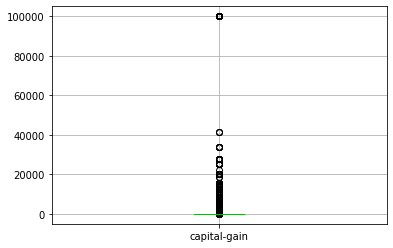

In [21]:
adult_df.loc[adult_df['capital-gain'] == '?'] = 0
adult_df['capital-gain'] = adult_df['capital-gain'].astype(int)
adult_df.boxplot(column=['capital-gain'])

У большинства людей капитала нет, поэтому если что-то и отсекать, то ориентируясь только на тех, у кого капитал есть. 


Вообще, обращаясь к предметной области, есть такое понятие как правило 4%. То есть большинство людей с капиталом отщипывают от него ежегодно по 4%. Даже во влажениях без особого риска в среднем капитал вырастает в год на ~15%. То есть если прирост капитала больше 20-40К вообще нет смысла что-то угадывать моделями. 


![jupyter](https://avatars.mds.yandex.net/get-zen_doc/1860621/pub_5d69f610028d6800ac249378_5d69f71303bdd400ac889b0c/scale_600)

In [22]:
adult_df['capital-loss'].value_counts()

0       46562
1902      304
1977      253
1887      231
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: capital-loss, Length: 99, dtype: int64

<AxesSubplot:>

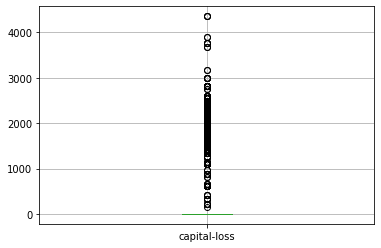

In [23]:
adult_df.loc[adult_df['capital-loss'] == '?'] = 0
adult_df['capital-loss'] = adult_df['capital-loss'].astype(int)
adult_df.boxplot(column=['capital-loss'])

Здесь что-либо отрезать не стоит. Особых вбросов нет. Боле того, с практической точки зрения это, вероятно, самая важная аудитория. Ведь, вероятнее всего, оценивать людей на состоятельность хочет банк и,вероятно, для решения о даче кредита. Вполне возможно, что не малая часть людей с небольшой потерей капитала - те, кто решил попробовать открыть своё дело, но не пошло. А об открытии своего дела задумываются, как правило, люди с определённым доходом

In [24]:
adult_df['hours-per-week'].value_counts()
adult_df['hours-per-week'] = adult_df['hours-per-week'].astype(int)
#adult_df.loc[adult_df['hours-per-week'] == None]

<AxesSubplot:>

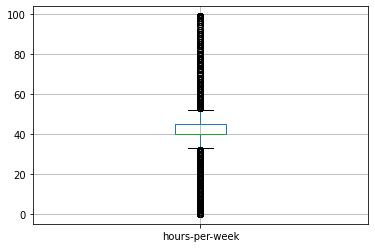

In [25]:
adult_df.boxplot(column=['hours-per-week'])

In [26]:
!pip install -U seaborn

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

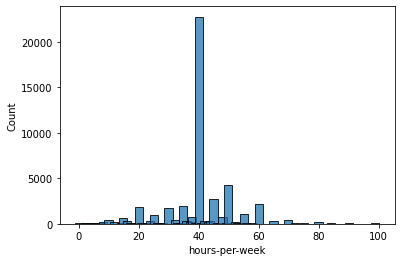

In [27]:
import seaborn as sns

sns.histplot(adult_df['hours-per-week'], shrink=10)

In [28]:
adult_df['native-country'].value_counts()

United-States                 43788
Mexico                          951
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

Последние 20 мне кажется можно смело менять на "?"

In [29]:
adult_df['native-country'] = adult_df['native-country'].apply(lambda nc: nc if not(nc in adult_df['native-country'].value_counts()[-20:]) else "?")
adult_df['native-country'].value_counts()

United-States         43788
?                      1535
Mexico                  951
Philippines             294
Germany                 206
Puerto-Rico             184
Canada                  182
El-Salvador             155
India                   151
Cuba                    138
England                 127
China                   122
South                   115
Jamaica                 106
Italy                   105
Dominican-Republic      103
Japan                    92
Guatemala                88
Poland                   87
Vietnam                  86
Columbia                 85
Haiti                    75
Portugal                 67
Name: native-country, dtype: int64

In [30]:
DUMMY_SEP = '__'

In [31]:
adult_df = pd.get_dummies(adult_df,columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], prefix_sep=DUMMY_SEP)
adult_df

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass__0,workclass__?,workclass__Federal-gov,workclass__Local-gov,...,native-country__Jamaica,native-country__Japan,native-country__Mexico,native-country__Philippines,native-country__Poland,native-country__Portugal,native-country__Puerto-Rico,native-country__South,native-country__United-States,native-country__Vietnam
0,25,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,38,9,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,28,12,0,0,40,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,44,10,7688,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,18,10,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,9,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48839,58,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48840,22,9,0,0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Делю на выборки

In [32]:
from sklearn.model_selection import train_test_split

train, test =  train_test_split( adult_df, test_size =0.1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

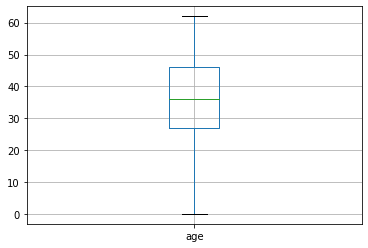

In [33]:
train['age'] = train['age'].astype(int)
train = train.loc[train['age'] < train['age'].quantile(q=0.95)]
train.boxplot(column=['age'])

In [34]:
from sklearn import preprocessing

scaler_age = preprocessing.StandardScaler().fit(train[['age']])

train['age'] = scaler_age.transform(train[['age']]).reshape(-1)
test['age'] = scaler_age.transform(test[['age']]).reshape(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

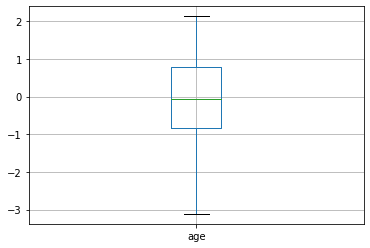

In [35]:
train.boxplot(column=['age'])

<AxesSubplot:>

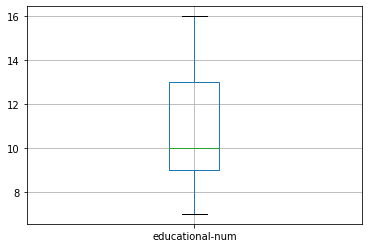

In [36]:
train['educational-num'] = train['educational-num'].astype(int)
train = train.loc[train['educational-num'] > train['educational-num'].quantile(q=0.05)]
train.boxplot(column=['educational-num'])

In [37]:
scaler_educational_num = preprocessing.StandardScaler().fit(train[['educational-num']])

train['educational-num'] = scaler_educational_num.transform(train[['educational-num']]).reshape(-1)
test['educational-num'] = scaler_educational_num.transform(test[['educational-num']]).reshape(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:>

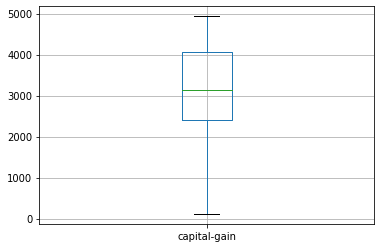

In [38]:
train = train.loc[train['capital-gain'] < train['capital-gain'].quantile(q=0.95) * (train['capital-gain'] > 0)]
train.boxplot(column=['capital-gain'])

In [39]:
scaler_cap_g = preprocessing.StandardScaler().fit(train[['capital-gain']])

train['capital-gain'] = scaler_cap_g.transform(train[['capital-gain']]).reshape(-1)
test['capital-gain'] = scaler_cap_g.transform(test[['capital-gain']]).reshape(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
scaler_cap_l = preprocessing.StandardScaler().fit(train[['capital-loss']])

train['capital-loss'] = scaler_cap_l.transform(train[['capital-loss']]).reshape(-1)
test['capital-loss'] = scaler_cap_l.transform(test[['capital-loss']]).reshape(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
scaler_hpw = preprocessing.StandardScaler().fit(train[['hours-per-week']])

train['hours-per-week'] = scaler_hpw.transform(train[['hours-per-week']]).reshape(-1)
test['hours-per-week'] = scaler_hpw.transform(test[['hours-per-week']]).reshape(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
x_train = train.drop('income', axis = 1)
y_train = train['income']

x_test = test.drop('income', axis = 1)
y_test = test['income']

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(92, 168)
        self.relu1 = nn.ReLU() 
        
        self.fc2 = nn.Linear(168, 336)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(336, 168)
        self.relu3 = nn.ReLU()
        
        
        self.fc4 = nn.Linear(168, 2)
        
    def forward(self, x):
        #x = x.view(0 , 84)
        x = self.fc1(x)
        x = self.relu1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        
        x = self.fc3(x)
        x = self.relu3(x)
        
        
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

In [44]:
cuda_device = torch.device('cuda')
cpu_device = torch.device('cpu')
device = cuda_device

In [45]:
net = Net()
net = net.to('cuda')
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

for epoch in range(10):
    for i in range(len(x_train)):
        X = torch.tensor([np.array(x_train)[i]]).to(torch.float).to(device)
        y = torch.tensor([np.array(y_train)[i]]).to(torch.long).to(device)
        #print(y)
        net.zero_grad() 
        output = (net(X))
        #print(y, output)
        loss = F.nll_loss(output, y)
        #print(y, output, loss)
        loss.backward()
        optimizer.step()
    print(loss)
    
correct = 0
total = 0
with torch.no_grad():
    for i in range(len(x_train)):
        X = torch.tensor([np.array(x_train)[i]]).to(torch.float).to(device)
        y = torch.tensor([np.array(y_train)[i]]).to(torch.long).to(device)
        output = (net(X))
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))
correct = 0
total = 0
with torch.no_grad():
    for i in range(len(x_test)):
        X = torch.tensor([np.array(x_test)[i]]).to(torch.float).to(device)
        y = torch.tensor([np.array(y_test)[i]]).to(torch.long).to(device)
        output = (net(X))
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

tensor(0.0401, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0157, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0193, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0872, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0554, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0349, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0230, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy:  0.921
Accuracy:  0.804
